In [62]:
import pandas as pd
import gzip
import os
import matplotlib.pyplot as plt

TCGA_path = './TCGA/'
Xenium_path = './XeniumPanels/'

In [63]:
TCGA_dir = os.listdir(TCGA_path)
TCGA_files = [file for file in TCGA_dir if file.endswith('.tsv')]

Xenium_dir = os.listdir(Xenium_path)
Xenium_files = [file for file in Xenium_dir if file.endswith('.csv')]

In [64]:
print(Xenium_files)
Xenium_titles = Xenium_files.copy()
for i in range(len(Xenium_titles)):
    Xenium_titles[i] = Xenium_titles[i].split('_')[1]
print(Xenium_titles)

['Xenium_hSkin_preview_metadata.csv', 'Xenium_hBrain_v1_metadata.csv', 'Xenium_hColon_preview_metadata.csv', 'Xenium_hBreast_v1_metadata.csv', 'Xenium_hLung_v1_metadata.csv', 'Xenium_hMulti_v1_metadata.csv']
['hSkin', 'hBrain', 'hColon', 'hBreast', 'hLung', 'hMulti']


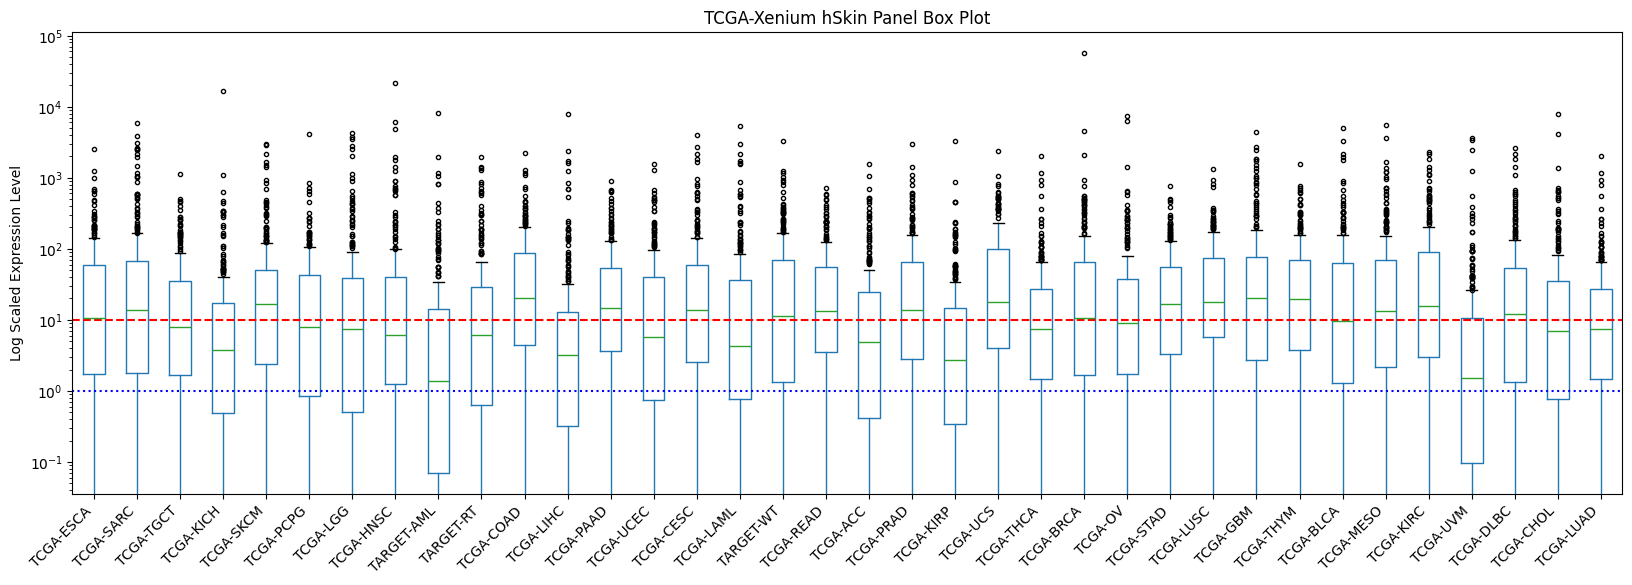

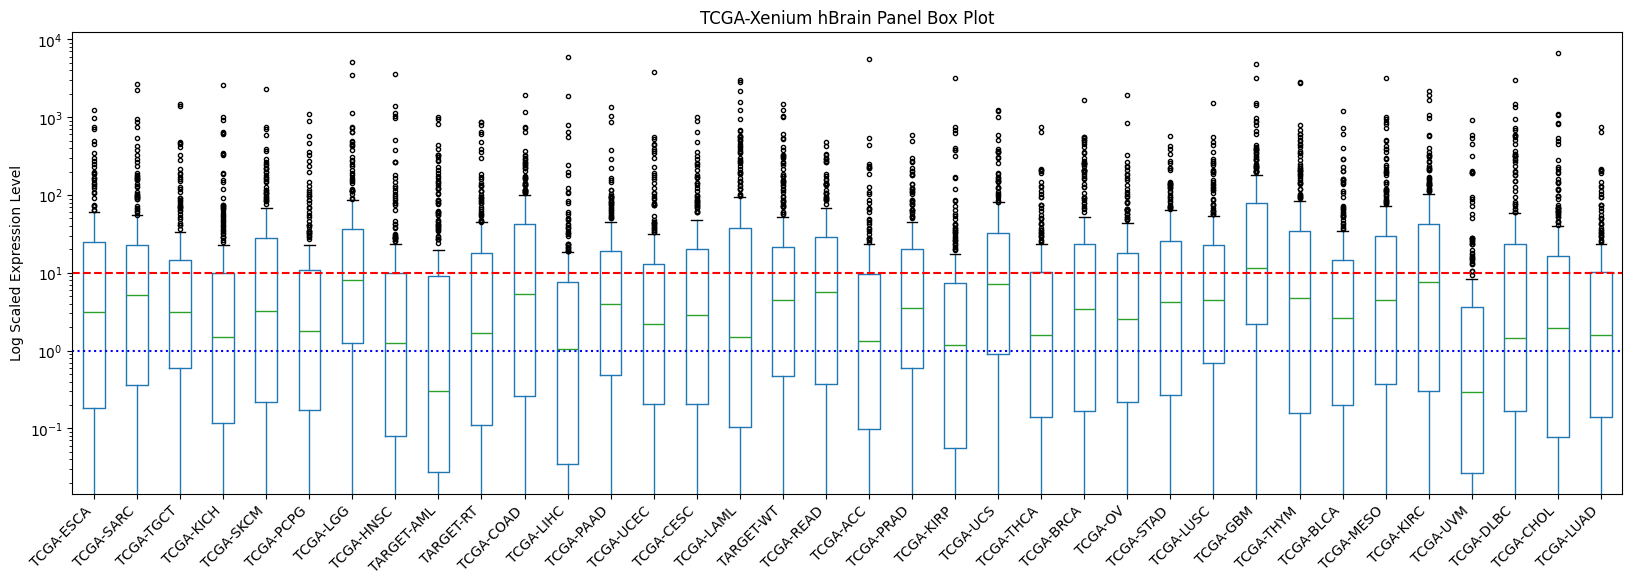

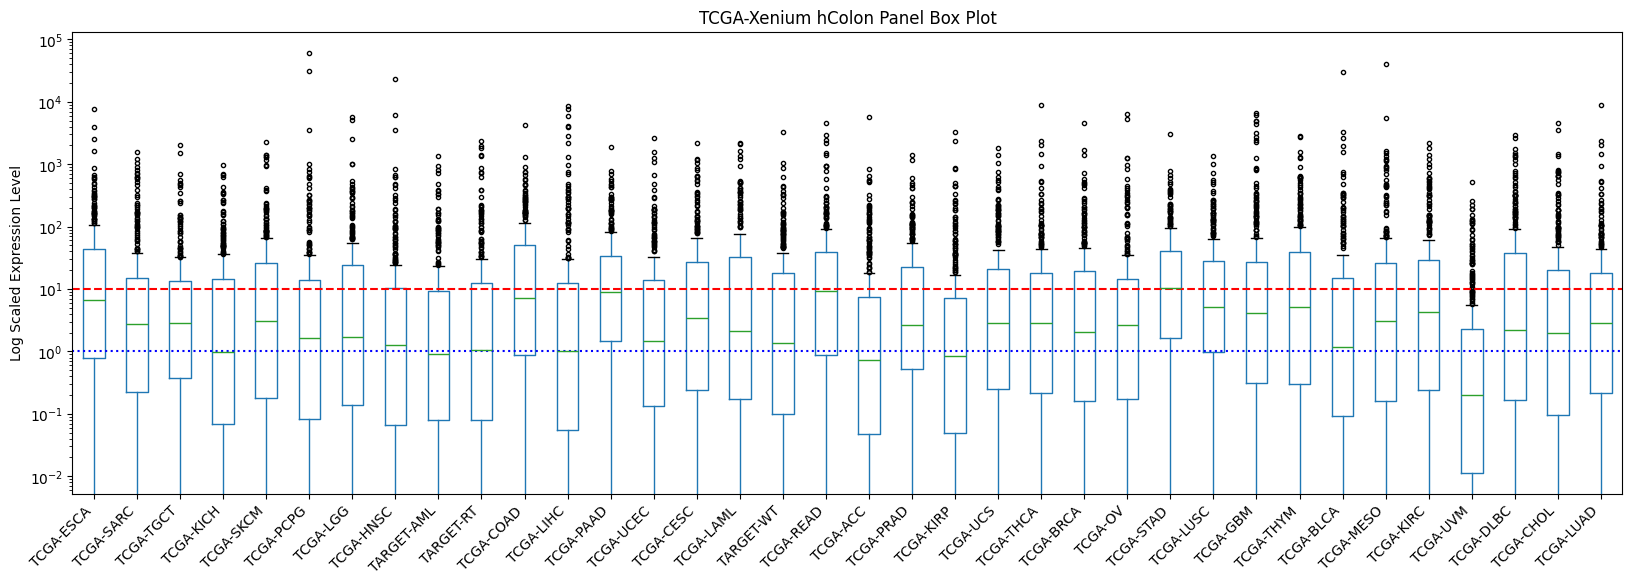

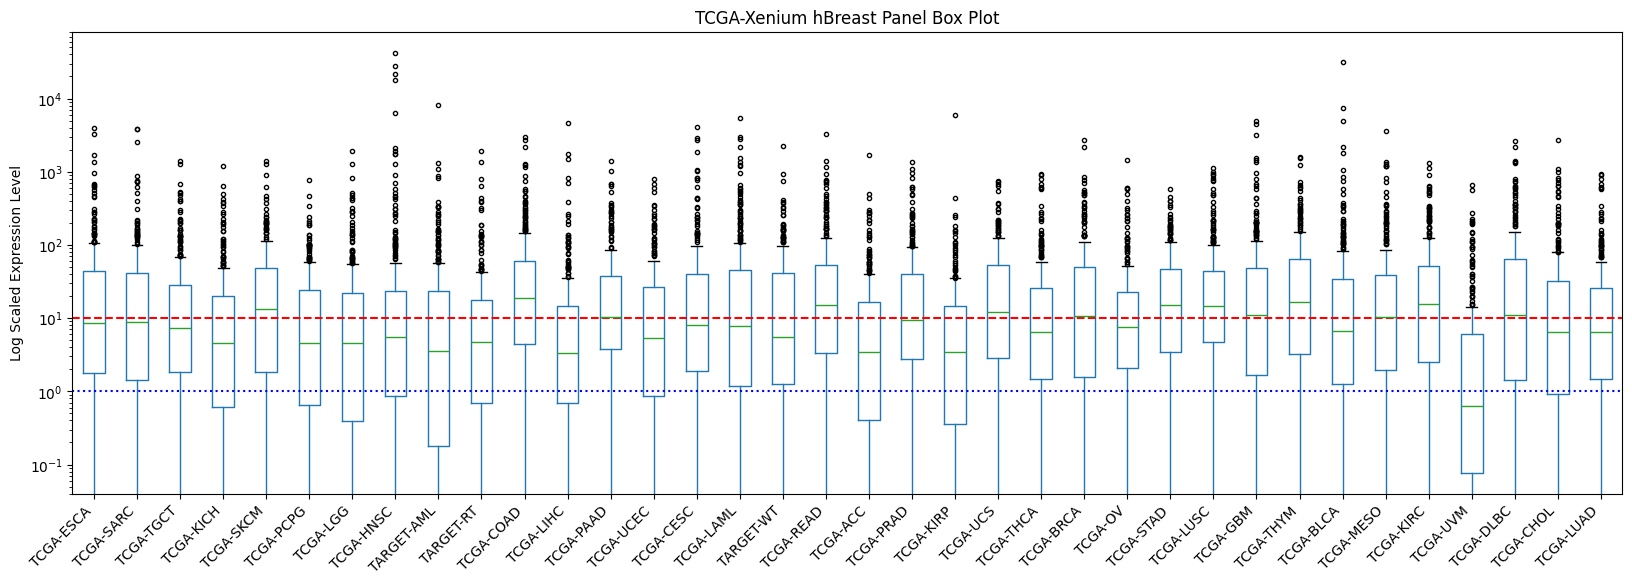

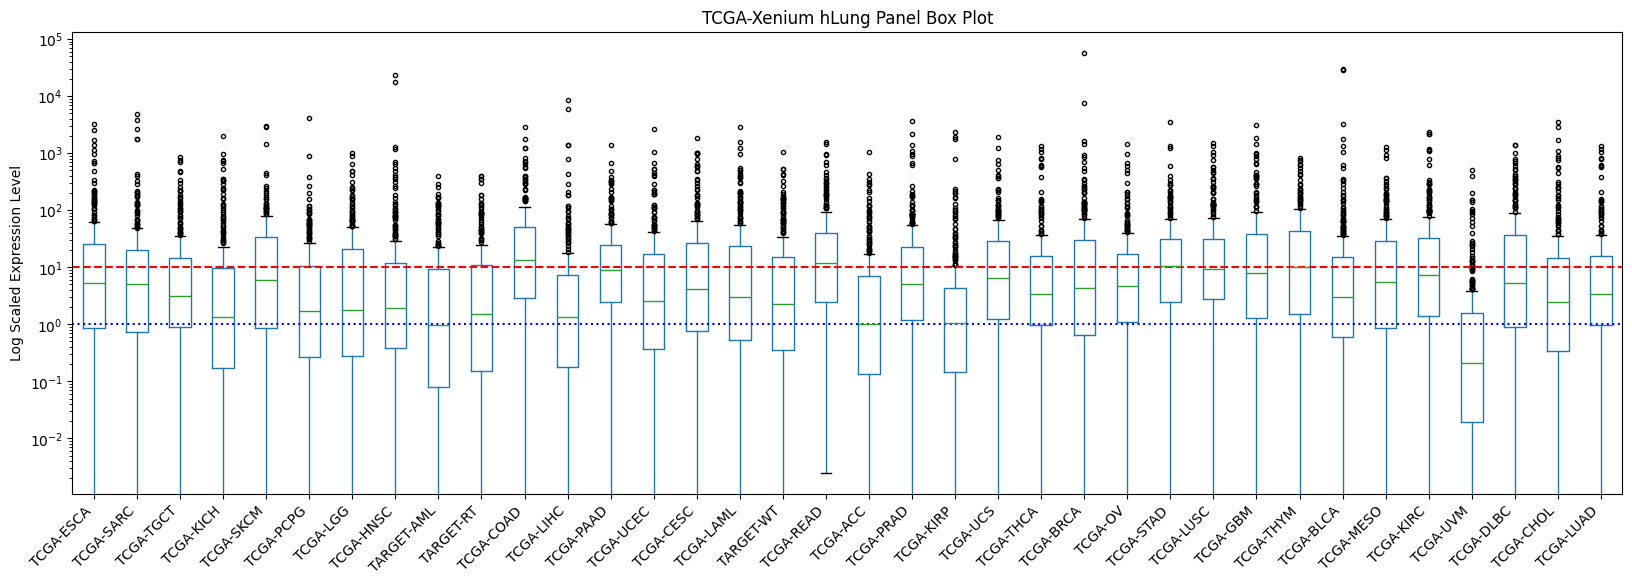

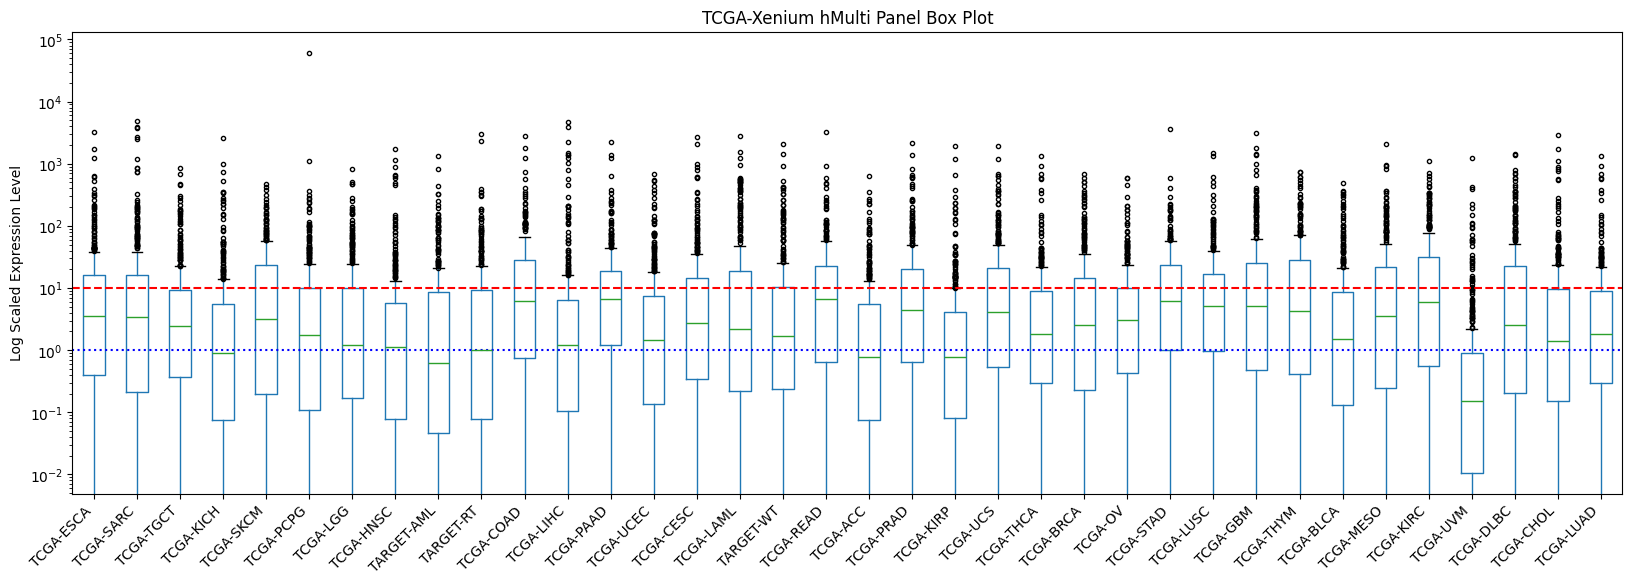

In [65]:
for x in range(len(Xenium_files)):
    tissue_series_list = []
    for t in TCGA_files:
        
        df = pd.read_csv(TCGA_path+t, sep='\t', skiprows=[0])
        df = df[df['gene_id'].str.startswith('ENSG')]
        df.reset_index(drop=True, inplace=True)

        gene_list_path = Xenium_path+Xenium_files[x]
        df_genes = pd.read_csv(gene_list_path)

        ensemble_ids = df_genes['Ensembl_ID'].unique()
        df['gene_id'] = df['gene_id'].str.split('.').str[0]
        filtered_df = df[df['gene_id'].isin(ensemble_ids)]

        filtered_df.set_index('gene_id', inplace=True)

        tissue_series_list.append(filtered_df['tpm_unstranded'])
    
    df_plot = pd.concat(tissue_series_list, axis=1)
    # df_plot.columns = GTEX_files
    # print(df_plot)
    TCGA_names = TCGA_files.copy()
    for i in range(len(TCGA_names)):
        TCGA_names[i] = TCGA_names[i].replace('.tsv', '')

    plt.figure(figsize=(20, 6))
    box = df_plot.boxplot(flierprops=dict(markersize=3), grid=False)
    box.set_xticklabels(TCGA_names, rotation=45, ha='right')
    plt.ylabel('Log Scaled Expression Level')
    plt.yscale('log')
    plt.title('TCGA-Xenium ' + Xenium_titles[x] + ' Panel Box Plot')
    plt.axhline(y=10, color='r', linestyle='--')
    plt.axhline(y=1, color='b', linestyle=':') 
    plt.show()